In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# data wrangling
import pandas as pd
import numpy as np

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# py files
import acquire
import prepare
import explore
import model

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = acquire.acquire_agg_data()

In [3]:
df = prepare.prepare(df)

In [4]:
df = prepare.unique(df)

In [5]:
df = explore.remove_manufacturers(df)

In [6]:
df.head()

,serial_number,manufacturer,model,capacity_terabytes,failure,drive_age_in_years,reallocated_sectors_count,reported_uncorrectable_errors,command_timeout,current_pending_sector_count,uncorrectable_sector_count
0,PL1311LAG1SJAA,Hitachi,Hitachi HDS5C4040ALE630,4.0,0,5.0,0.0,NaN,NaN,0.0,0.0
1,Z305KB36,Seagate,ST4000DM000,4.0,0,3.5,0.0,0.0,0.0,0.0,0.0
2,MJ0351YNG9MZXA,Hitachi,Hitachi HDS5C3030ALA630,3.0,0,4.8,0.0,NaN,NaN,0.0,0.0
3,ZA11NHSN,Seagate,ST8000DM002,8.0,0,3.0,0.0,0.0,0.0,0.0,0.0
4,MJ1311YNG2ZSEA,Hitachi,Hitachi HDS5C3030ALA630,3.0,0,5.5,0.0,NaN,NaN,0.0,0.0


In [7]:
df = prepare.treat_nulls(df)

In [8]:
df.head()

,serial_number,manufacturer,model,capacity_terabytes,failure,drive_age_in_years,reallocated_sectors_count,reported_uncorrectable_errors,command_timeout,current_pending_sector_count,uncorrectable_sector_count
0,PL1311LAG1SJAA,Hitachi,Hitachi HDS5C4040ALE630,4.0,0,5.0,0.0,0.0,0.0,0.0,0.0
1,Z305KB36,Seagate,ST4000DM000,4.0,0,3.5,0.0,0.0,0.0,0.0,0.0
2,MJ0351YNG9MZXA,Hitachi,Hitachi HDS5C3030ALA630,3.0,0,4.8,0.0,0.0,0.0,0.0,0.0
3,ZA11NHSN,Seagate,ST8000DM002,8.0,0,3.0,0.0,0.0,0.0,0.0,0.0
4,MJ1311YNG2ZSEA,Hitachi,Hitachi HDS5C3030ALA630,3.0,0,5.5,0.0,0.0,0.0,0.0,0.0


In [9]:
df_stack = df[['model','manufacturer','drive_age_in_years']]

In [10]:
df_stack = df.groupby('model').agg({'manufacturer': 'max','drive_age_in_years':'median'})

In [11]:
df_stack.head()

,manufacturer,drive_age_in_years
model,,
HGST HDS5C4040ALE630,Hitachi,2.4
HGST HDS724040ALE640,Hitachi,4.0
HGST HMS5C4040ALE640,Hitachi,3.6
HGST HMS5C4040BLE640,Hitachi,3.3
HGST HMS5C4040BLE641,Hitachi,0.9


In [12]:
df_stack = explore.get_quartile(df_stack)

In [13]:
df_stack = df_stack.drop(columns=['drive_age_in_years'])
df_stack = df_stack.reset_index()

In [14]:
df_stack = df_stack.drop(columns='model')

In [15]:
df_stack['count']= 1

In [16]:
df_stack

,manufacturer,quartile,count
0,Hitachi,Q2,1
1,Hitachi,Q4,1
2,Hitachi,Q3,1
3,Hitachi,Q3,1
4,Hitachi,Q1,1
...,...,...,...
90,Western Digital,Q4,1
91,Western Digital,Q4,1
92,Western Digital,Q4,1
93,Western Digital,Q4,1


In [18]:
df_stack.groupby(['manufacturer','quartile']).count().reset_index()

,manufacturer,quartile,count
0,Hitachi,Q1,5
1,Hitachi,Q2,2
2,Hitachi,Q3,4
3,Hitachi,Q4,8
4,Seagate,Q1,11
5,Seagate,Q2,4
6,Seagate,Q3,4
7,Seagate,Q4,12
8,Toshiba,Q1,2
9,Toshiba,Q2,3


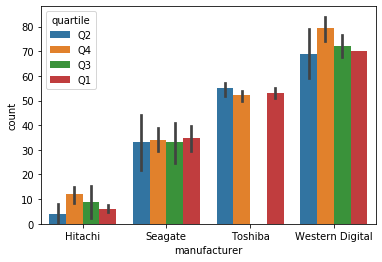

In [32]:
sns.barplot(x='manufacturer', y='count', hue='quartile', data=df_stack)